In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from scipy.stats import normaltest

import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [3]:
df = pd.read_csv('../data/consumo.csv', parse_dates=['Fecha'])
df

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gas natural,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,2000-01-01,0.00,48446.00,296766.99,0.00,0.00,0.00,0.00,194410.476190,NaN,...,64026.09,0.00,0.00,0.00,0.00,0.00,0.0,634667.06,0,1.750545e+06
1,2000-02-01,0.00,50597.00,328116.44,0.00,0.00,0.00,0.00,174710.552381,NaN,...,62660.30,0.00,0.00,0.00,0.00,0.00,0.0,642380.66,0,1.773220e+06
2,2000-03-01,0.00,27593.00,368589.63,0.00,0.00,0.00,0.00,189234.066667,NaN,...,61361.99,0.00,0.00,0.00,0.00,0.00,0.0,699807.25,0,1.909499e+06
3,2000-04-01,0.00,53794.00,396300.47,0.00,0.00,0.00,0.00,174330.607143,NaN,...,61814.32,0.00,0.00,0.00,0.00,0.00,0.0,586803.98,0,1.800933e+06
4,2000-05-01,0.00,60137.00,449368.92,0.00,0.00,0.00,0.00,191745.147619,NaN,...,54098.32,0.00,0.00,0.00,0.00,0.00,0.0,656948.20,0,1.941772e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-08-01,32669.87,16086.77,155156.95,-129.83,88992.17,1220254.20,13769.72,551959.940000,-5125.38,...,145.23,1757.07,547.58,865931.91,84348.69,11037.39,0.0,0.00,0,4.617048e+06
296,2024-09-01,17724.39,14404.37,129059.65,-682.98,78639.27,1161480.31,14234.41,555676.210000,-3617.05,...,50.76,1442.97,92.59,491181.54,78185.20,16852.16,0.0,0.00,0,4.068636e+06
297,2024-10-01,2900.53,14718.66,168233.85,18.55,77767.06,1399433.57,15236.22,600476.170000,0.00,...,129.48,1816.42,301.66,487452.36,88885.31,15873.86,0.0,0.00,0,4.599042e+06
298,2024-11-01,26601.36,40510.01,126219.84,42.69,82355.21,1307939.01,24281.06,597059.900000,0.00,...,-405.57,3646.69,213.66,458139.11,77270.48,12489.70,0.0,0.00,0,4.281218e+06


In [4]:
df = pd.read_csv('../data/importacion.csv', parse_dates=['Fecha'])
df

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,2001-01-01,0.00,27748.99,214581.84,0.00,0.00,0.00,0.00,1.940657e+05,820.00,...,0.00,0.00,0.0,0.00,0.0,566101.99,8402,0.0,715344,2.312639e+06
1,2001-02-01,0.00,7503.57,294609.00,0.00,0.00,0.00,0.00,1.707034e+05,3054.00,...,0.00,0.00,0.0,0.00,0.0,489525.80,0,0.0,370166,1.769209e+06
2,2001-03-01,0.00,26304.32,315263.80,0.00,0.00,0.00,0.00,1.618374e+05,677.00,...,0.00,0.00,0.0,0.00,0.0,575559.68,0,0.0,360530,1.945770e+06
3,2001-04-01,0.00,7885.89,205653.00,0.00,0.00,0.00,0.00,1.630486e+05,3399.00,...,0.00,0.00,0.0,0.00,0.0,437745.42,8184,0.0,359527,1.623638e+06
4,2001-05-01,0.00,8443.16,278371.30,0.00,0.00,0.00,0.00,1.715189e+05,585.00,...,0.00,0.00,0.0,0.00,0.0,552609.13,12680,0.0,723346,2.262727e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2024-08-01,30632.00,5368.59,132586.54,29.48,110592.79,1225913.63,4958.00,9.774055e+05,0.00,...,80.10,838116.22,165.0,9913.98,0.0,0.00,0,0.0,0,4.844687e+06
284,2024-09-01,22499.72,3285.69,52690.88,17.14,68512.86,1165542.44,5000.74,7.367298e+05,9651.28,...,40.00,498624.55,0.0,21410.77,0.0,0.00,0,0.0,0,4.550670e+06
285,2024-10-01,27571.07,3966.67,165597.43,4.29,72755.73,1393578.36,40240.99,7.268966e+05,0.00,...,40.00,339301.76,4506.0,12823.98,0.0,0.00,0,0.0,0,4.364946e+06
286,2024-11-01,28368.36,7403.83,14866.39,17.51,72467.45,1298981.28,10009.36,4.951095e+05,0.00,...,248.14,254682.00,4251.0,9352.20,0.0,0.00,0,0.0,0,3.722530e+06


In [9]:
# Cargar los datos
df_import = pd.read_csv('../data/importacion.csv', parse_dates=['Fecha'])
df_cons = pd.read_csv('../data/consumo.csv', parse_dates=['Fecha'])

# Combinar columnas de diesel en una sola
diesel_cols = ['Diesel alto azufre', 'Diesel bajo azufre', 'Diesel ultra bajo azufre']

# Verificar que existan las columnas antes de sumar
for col in diesel_cols:
    if col not in df_import.columns:
        print(f" Columna faltante en importacion: {col}")
    if col not in df_cons.columns:
        print(f" Columna faltante en consumo: {col}")

# Crear nueva columna Diesel como suma de subcategorías
df_import['Diesel'] = df_import[diesel_cols].sum(axis=1)
df_cons['Diesel'] = df_cons[diesel_cols].sum(axis=1)

# Filtrar columnas relevantes
cols = ['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel']
df_import = df_import[cols].copy()
df_cons = df_cons[cols].copy()

# Revisar que esté bien
print(df_import.head())
print(df_cons.head())

       Fecha  Gasolina regular  Gasolina superior     Diesel
0 2001-01-01         177776.50          373963.96  566101.99
1 2001-02-01         123115.99          243091.07  489525.80
2 2001-03-01         161726.42          312084.38  575559.68
3 2001-04-01         127338.74          285054.89  437745.42
4 2001-05-01         168730.19          300913.67  552609.13
       Fecha  Gasolina regular  Gasolina superior     Diesel
0 2000-01-01         202645.20          308156.82  634667.06
1 2000-02-01         205530.96          307766.31  642380.66
2 2000-03-01         229499.56          331910.29  699807.25
3 2000-04-01         210680.40          315648.08  586803.98
4 2000-05-01         208164.34          319667.97  656948.20


In [10]:
print(df_import.describe())


                     Fecha  Gasolina regular  Gasolina superior        Diesel
count                  288      2.880000e+02       2.880000e+02  2.880000e+02
mean   2012-12-15 17:00:00      4.129493e+05       4.909544e+05  8.950957e+05
min    2001-01-01 00:00:00      8.101530e+04       1.702925e+05  2.297647e+05
25%    2006-12-24 06:00:00      2.082069e+05       3.693299e+05  6.920462e+05
50%    2012-12-16 12:00:00      3.275593e+05       4.813002e+05  8.462861e+05
75%    2018-12-08 18:00:00      5.761171e+05       6.083053e+05  1.124961e+06
max    2024-12-01 00:00:00      1.141366e+06       1.227174e+06  1.630636e+06
std                    NaN      2.432627e+05       1.565581e+05  2.939973e+05


# Importación

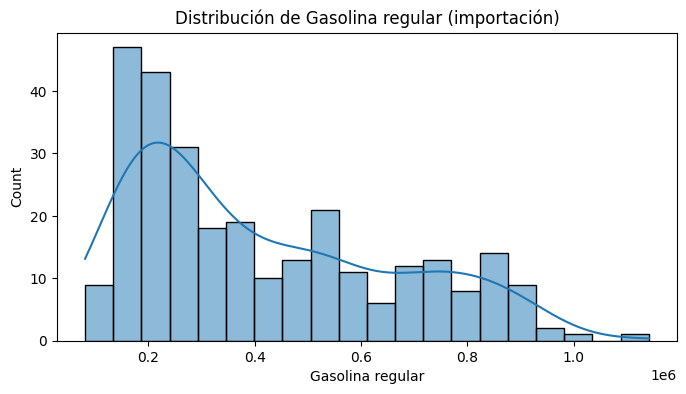

Gasolina regular - estadístico: 32.44, p-valor: 0.0000
 No se distribuye normalmente


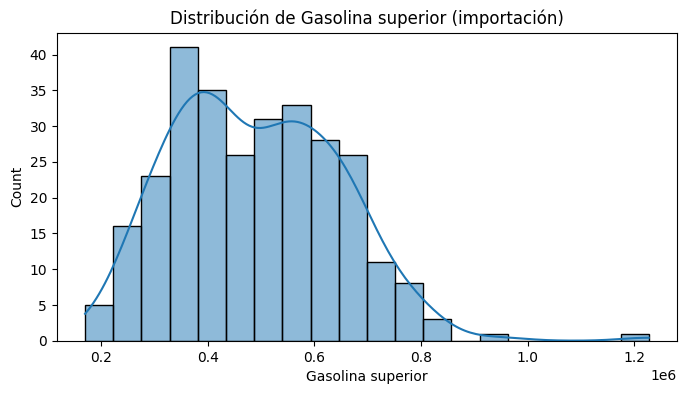

Gasolina superior - estadístico: 16.59, p-valor: 0.0003
 No se distribuye normalmente


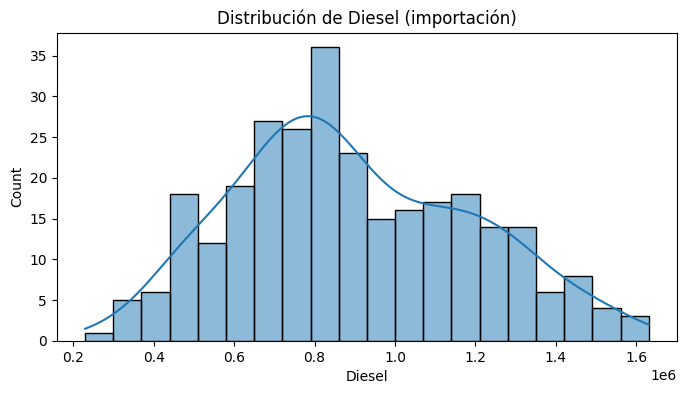

Diesel - estadístico: 11.97, p-valor: 0.0025
 No se distribuye normalmente


In [11]:
# Histogramas + KDE
for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_import[col], kde=True, bins=20)
    plt.title(f'Distribución de {col} (importación)')
    plt.show()

    # Test de normalidad (D’Agostino y Pearson)
    stat, p = normaltest(df_import[col].dropna())
    print(f"{col} - estadístico: {stat:.2f}, p-valor: {p:.4f}")
    if p < 0.05:
        print(" No se distribuye normalmente")
    else:
        print(" Podría estar normalmente distribuida")


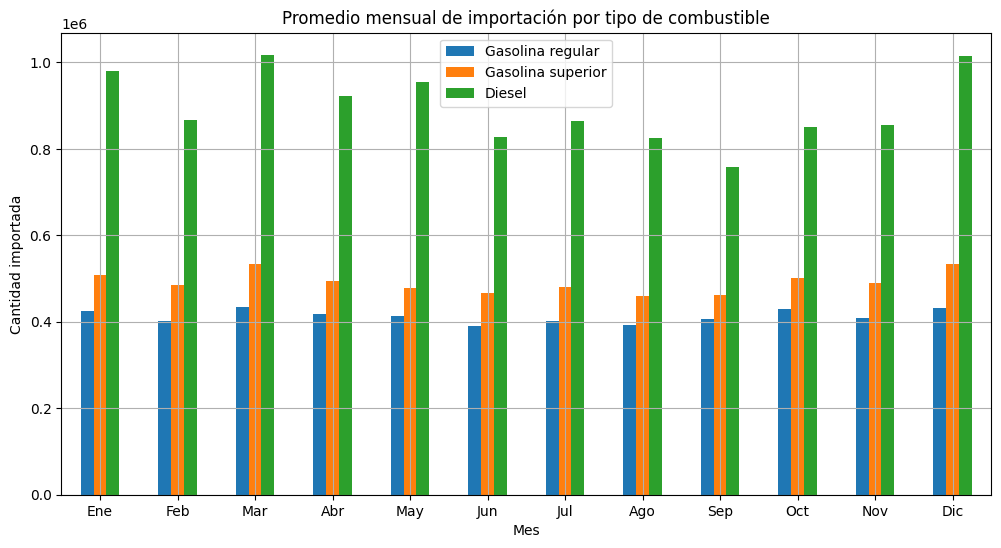

In [12]:
df_import['Mes'] = df_import['Fecha'].dt.month
monthly_avg = df_import.groupby('Mes')[['Gasolina regular', 'Gasolina superior', 'Diesel']].mean()

# Gráfica
monthly_avg.plot(kind='bar', figsize=(12,6))
plt.title('Promedio mensual de importación por tipo de combustible')
plt.ylabel('Cantidad importada')
plt.xlabel('Mes')
plt.xticks(ticks=range(0,12), labels=[
    'Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'], rotation=0)
plt.grid(True)
plt.show()


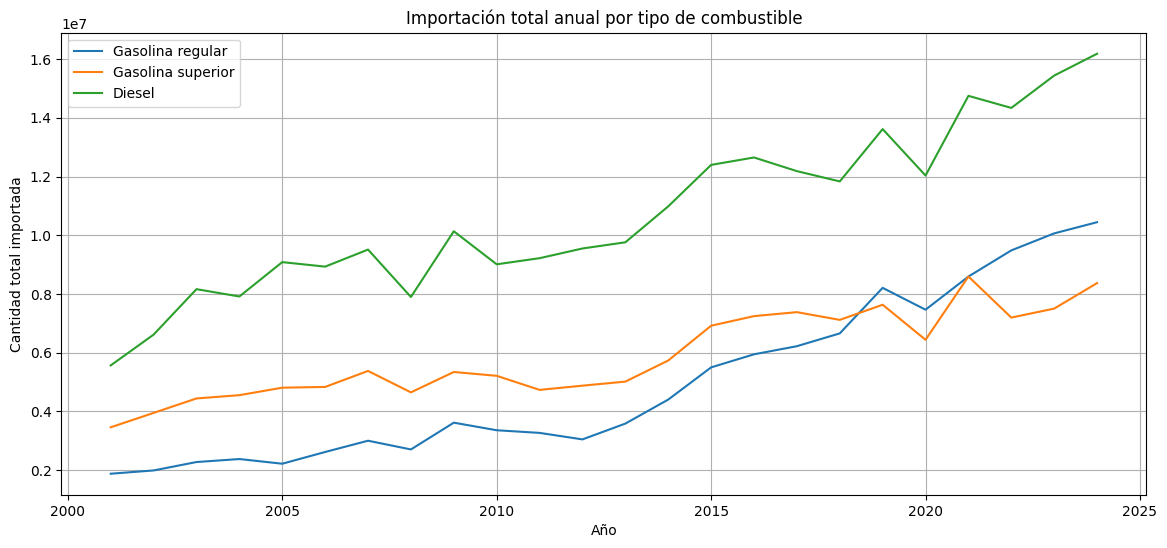

In [13]:
df_import['Año'] = df_import['Fecha'].dt.year
annual_total = df_import.groupby('Año')[['Gasolina regular', 'Gasolina superior', 'Diesel']].sum()

# Gráfica
annual_total.plot(figsize=(14,6))
plt.title('Importación total anual por tipo de combustible')
plt.ylabel('Cantidad total importada')
plt.grid(True)
plt.show()


In [14]:
for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    max_fecha = df_import.loc[df_import[col].idxmax(), 'Fecha']
    max_valor = df_import[col].max()
    print(f"Pico de {col}: {max_valor:.2f} en {max_fecha.strftime('%Y-%m')}")


Pico de Gasolina regular: 1141365.94 en 2024-09
Pico de Gasolina superior: 1227173.53 en 2021-04
Pico de Diesel: 1630635.64 en 2018-05


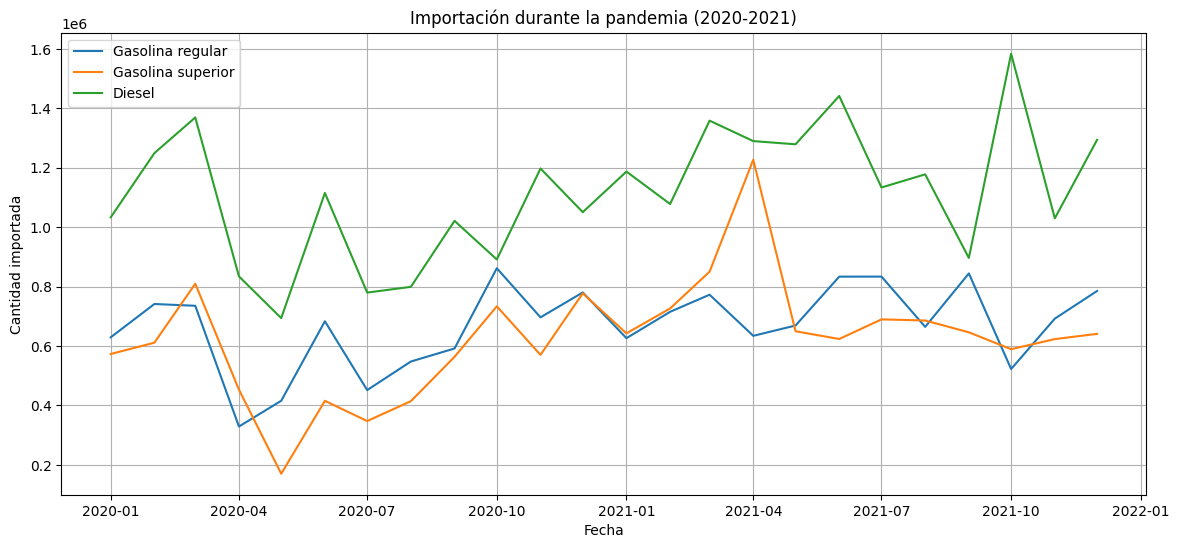

In [15]:
df_pandemia = df_import[(df_import['Fecha'] >= '2020-01-01') & (df_import['Fecha'] <= '2021-12-31')]

plt.figure(figsize=(14,6))
for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    plt.plot(df_pandemia['Fecha'], df_pandemia[col], label=col)
plt.title('Importación durante la pandemia (2020-2021)')
plt.ylabel('Cantidad importada')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.show()


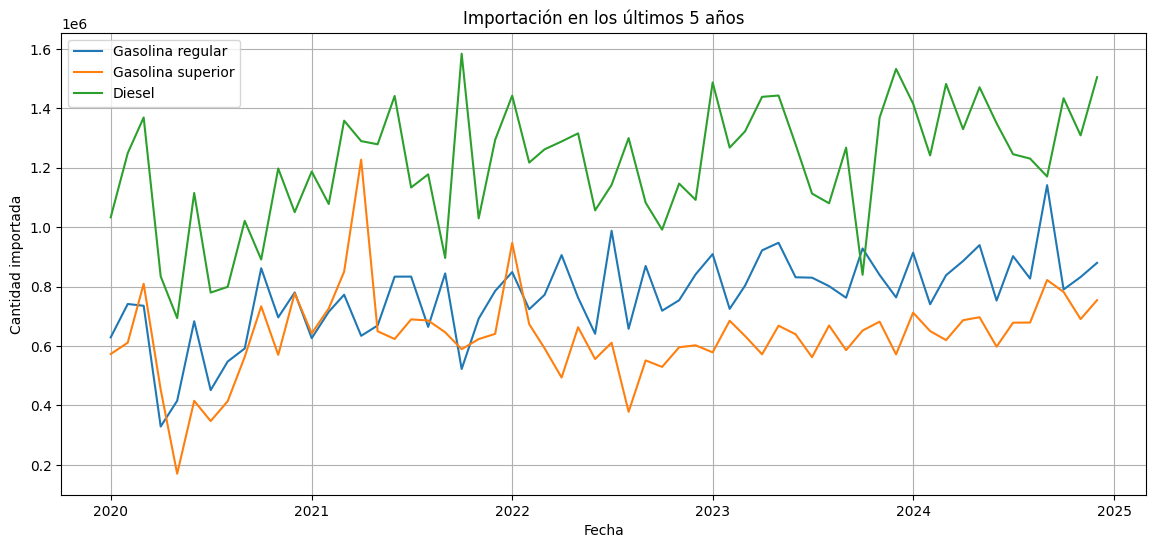

In [16]:
ultimo_anio = df_import['Año'].max()
df_ultimos = df_import[df_import['Año'] >= (ultimo_anio - 4)]

plt.figure(figsize=(14,6))
for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    plt.plot(df_ultimos['Fecha'], df_ultimos[col], label=col)
plt.title('Importación en los últimos 5 años')
plt.ylabel('Cantidad importada')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.show()


# Consumo

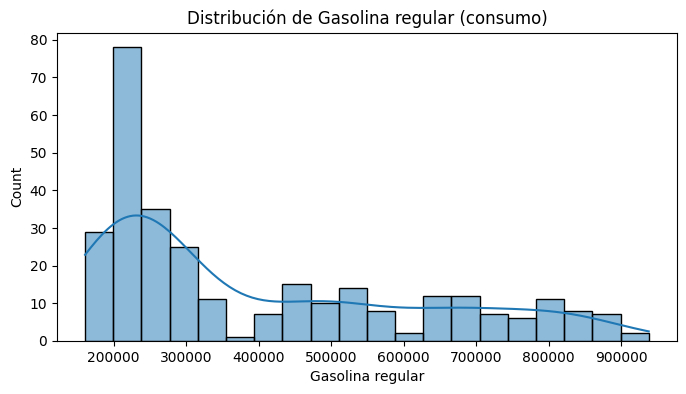

Gasolina regular - estadístico: 41.12, p-valor: 0.0000
 No se distribuye normalmente


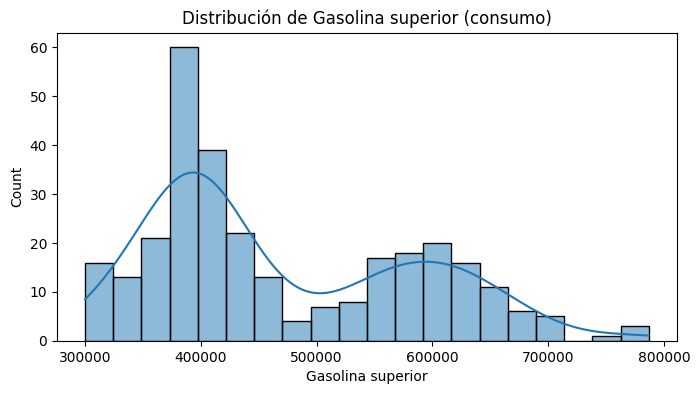

Gasolina superior - estadístico: 36.81, p-valor: 0.0000
 No se distribuye normalmente


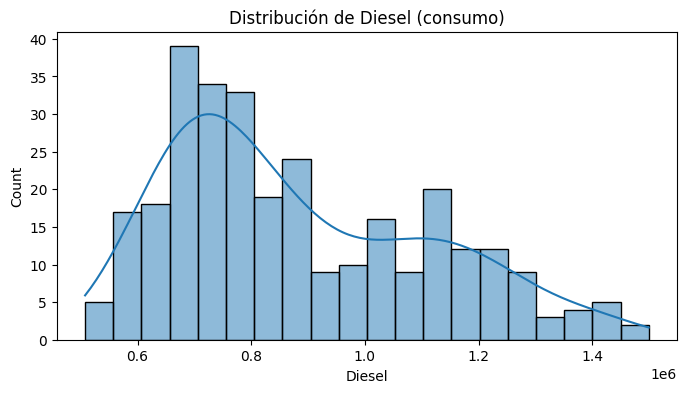

Diesel - estadístico: 25.55, p-valor: 0.0000
 No se distribuye normalmente


In [17]:
for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cons[col], kde=True, bins=20)
    plt.title(f'Distribución de {col} (consumo)')
    plt.show()

    stat, p = normaltest(df_cons[col].dropna())
    print(f"{col} - estadístico: {stat:.2f}, p-valor: {p:.4f}")
    if p < 0.05:
        print(" No se distribuye normalmente")
    else:
        print(" Podría estar normalmente distribuida")


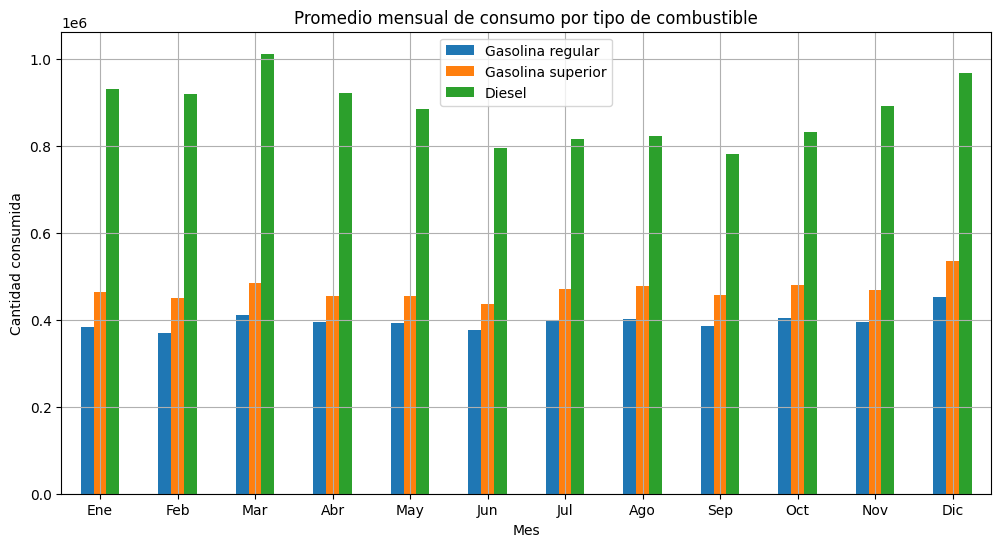

In [18]:
df_cons['Mes'] = df_cons['Fecha'].dt.month
monthly_avg_cons = df_cons.groupby('Mes')[['Gasolina regular', 'Gasolina superior', 'Diesel']].mean()

# Gráfica
monthly_avg_cons.plot(kind='bar', figsize=(12,6))
plt.title('Promedio mensual de consumo por tipo de combustible')
plt.ylabel('Cantidad consumida')
plt.xlabel('Mes')
plt.xticks(ticks=range(0,12), labels=[
    'Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'], rotation=0)
plt.grid(True)
plt.show()


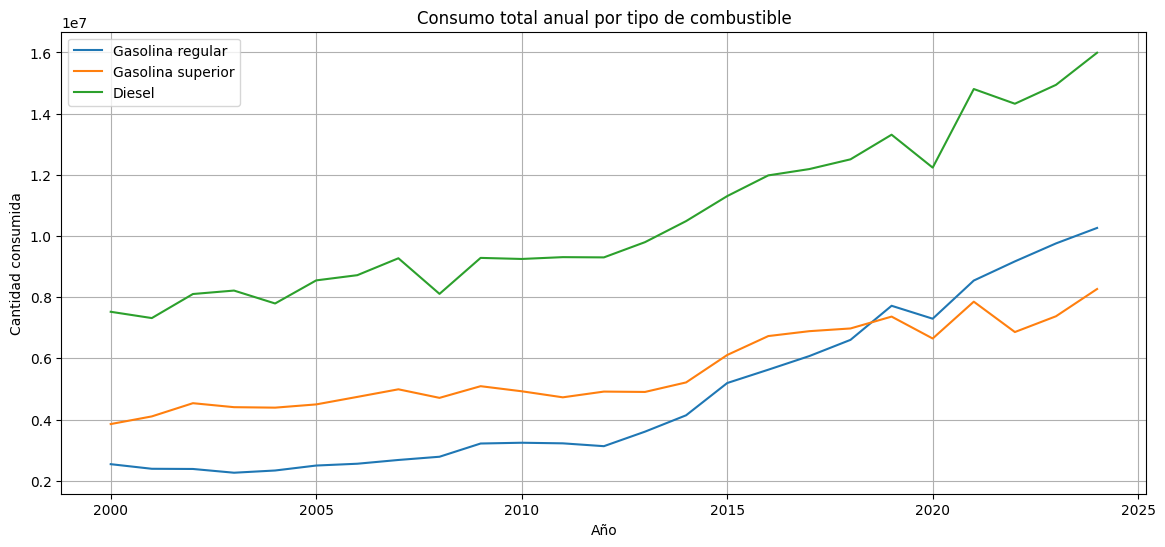

In [19]:
df_cons['Año'] = df_cons['Fecha'].dt.year
annual_cons = df_cons.groupby('Año')[['Gasolina regular', 'Gasolina superior', 'Diesel']].sum()

# Gráfica
annual_cons.plot(figsize=(14,6))
plt.title('Consumo total anual por tipo de combustible')
plt.ylabel('Cantidad consumida')
plt.grid(True)
plt.show()


In [20]:
for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    max_fecha = df_cons.loc[df_cons[col].idxmax(), 'Fecha']
    max_valor = df_cons[col].max()
    print(f"Pico de {col} (consumo): {max_valor:.2f} en {max_fecha.strftime('%Y-%m')}")


Pico de Gasolina regular (consumo): 938086.57 en 2024-10
Pico de Gasolina superior (consumo): 786598.12 en 2024-10
Pico de Diesel (consumo): 1499266.10 en 2024-12


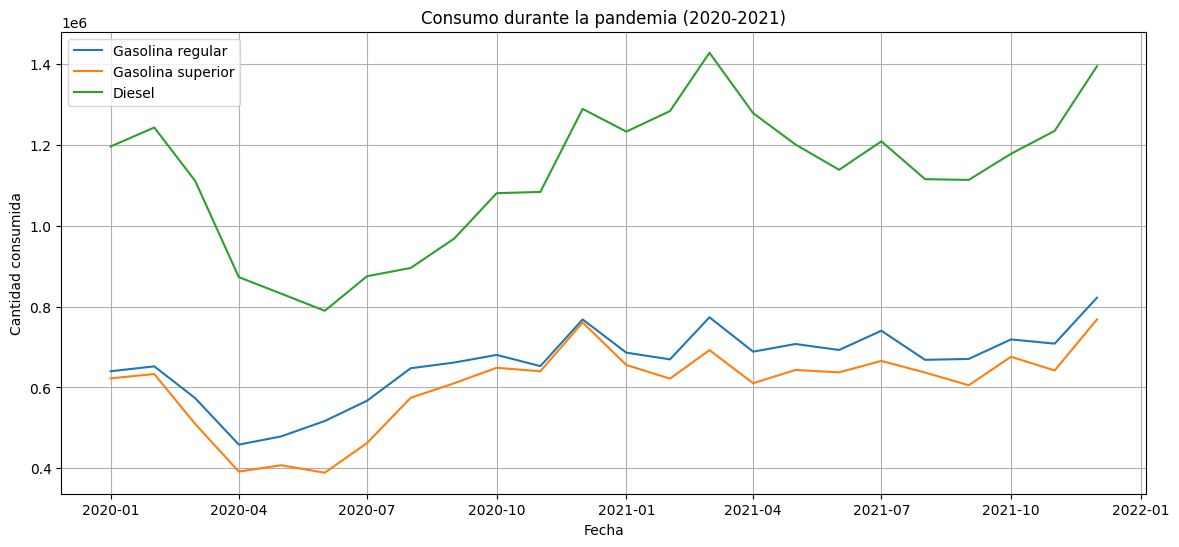

In [21]:
df_pandemia_cons = df_cons[(df_cons['Fecha'] >= '2020-01-01') & (df_cons['Fecha'] <= '2021-12-31')]

plt.figure(figsize=(14,6))
for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    plt.plot(df_pandemia_cons['Fecha'], df_pandemia_cons[col], label=col)
plt.title('Consumo durante la pandemia (2020-2021)')
plt.ylabel('Cantidad consumida')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.show()


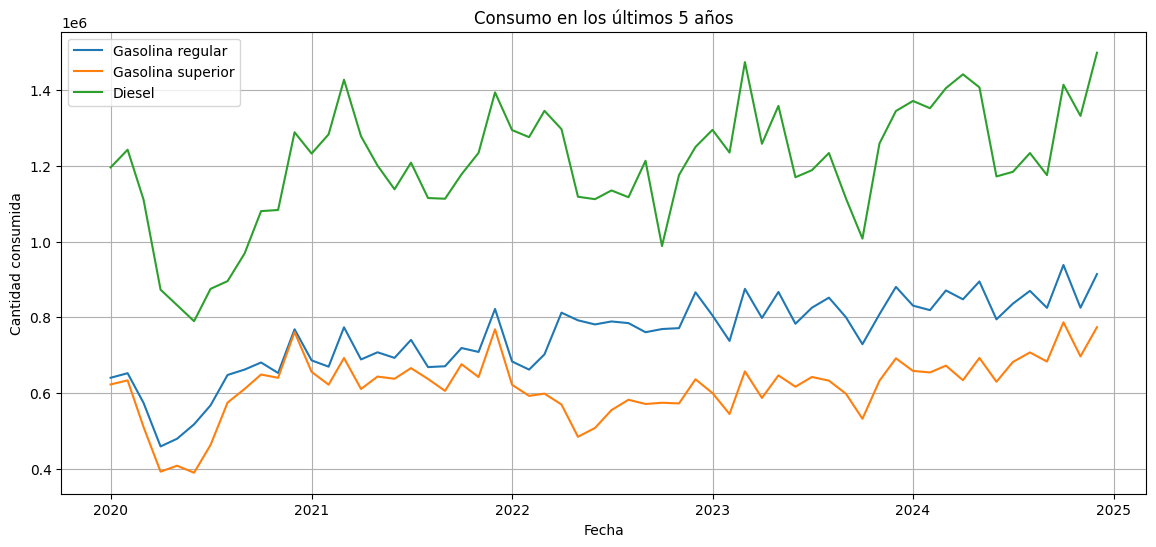

In [22]:
df_ultimos_cons = df_cons[df_cons['Año'] >= (df_cons['Año'].max() - 4)]

plt.figure(figsize=(14,6))
for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    plt.plot(df_ultimos_cons['Fecha'], df_ultimos_cons[col], label=col)
plt.title('Consumo en los últimos 5 años')
plt.ylabel('Cantidad consumida')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.show()


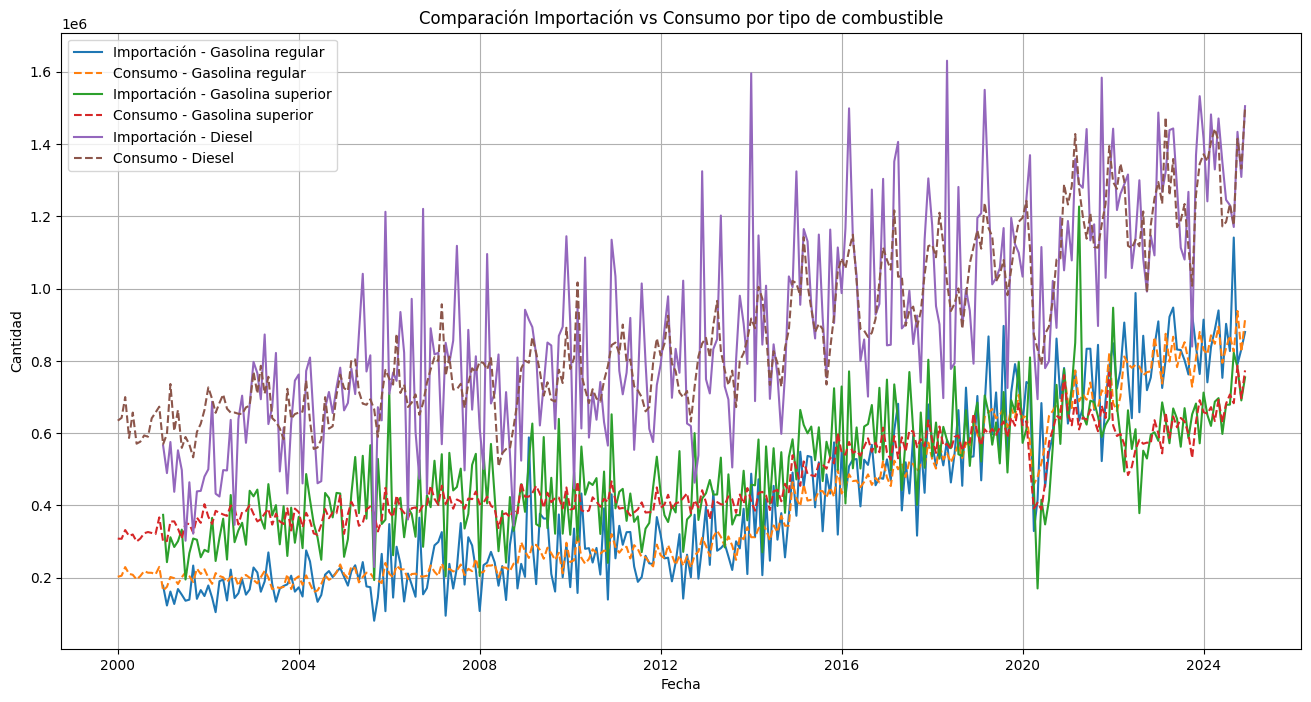

In [23]:
plt.figure(figsize=(16,8))

for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    plt.plot(df_import['Fecha'], df_import[col], label=f'Importación - {col}', linestyle='-')
    plt.plot(df_cons['Fecha'], df_cons[col], label=f'Consumo - {col}', linestyle='--')

plt.title('Comparación Importación vs Consumo por tipo de combustible')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# diccionario resumen

resumen = {
    'Variable': [],
    'Mayor mes de importación': [],
    'Mayor mes de consumo': [],
    'Año pico de importación': [],
    'Año pico de consumo': [],
    'Valor máximo importación': [],
    'Valor máximo consumo': [],
    'Fecha pico importación': [],
    'Fecha pico consumo': [],
}

# Para cada tipo de combustible
for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    # Mayor mes promedio
    mes_import = df_import.groupby('Mes')[col].mean().idxmax()
    mes_cons = df_cons.groupby('Mes')[col].mean().idxmax()

    # Año total más alto
    anio_import = df_import.groupby('Año')[col].sum().idxmax()
    anio_cons = df_cons.groupby('Año')[col].sum().idxmax()

    # Valor pico
    max_val_import = df_import[col].max()
    max_fecha_import = df_import.loc[df_import[col].idxmax(), 'Fecha'].strftime('%Y-%m')
    
    max_val_cons = df_cons[col].max()
    max_fecha_cons = df_cons.loc[df_cons[col].idxmax(), 'Fecha'].strftime('%Y-%m')

    resumen['Variable'].append(col)
    resumen['Mayor mes de importación'].append(mes_import)
    resumen['Mayor mes de consumo'].append(mes_cons)
    resumen['Año pico de importación'].append(anio_import)
    resumen['Año pico de consumo'].append(anio_cons)
    resumen['Valor máximo importación'].append(round(max_val_import, 2))
    resumen['Valor máximo consumo'].append(round(max_val_cons, 2))
    resumen['Fecha pico importación'].append(max_fecha_import)
    resumen['Fecha pico consumo'].append(max_fecha_cons)

# Crear DataFrame resumen
df_resumen = pd.DataFrame(resumen)

# Mostrar como tabla
import pandas as pd
from IPython.display import display
display(df_resumen)


,Variable,Mayor mes de importación,Mayor mes de consumo,Año pico de importación,Año pico de consumo,Valor máximo importación,Valor máximo consumo,Fecha pico importación,Fecha pico consumo
0,Gasolina regular,3,12,2024,2024,1141365.94,938086.57,2024-09,2024-10
1,Gasolina superior,3,12,2021,2024,1227173.53,786598.12,2021-04,2024-10
2,Diesel,3,3,2024,2024,1630635.64,1499266.10,2018-05,2024-12


In [25]:
# Series univariantes
series_import_reg = df_import.set_index('Fecha')['Gasolina regular']
series_import_sup = df_import.set_index('Fecha')['Gasolina superior']
series_import_dsl = df_import.set_index('Fecha')['Diesel']

series_cons_reg = df_cons.set_index('Fecha')['Gasolina regular']
series_cons_sup = df_cons.set_index('Fecha')['Gasolina superior']
series_cons_dsl = df_cons.set_index('Fecha')['Diesel']

# Función para imprimir info
def info_serie(nombre, serie):
    print(f"📈 {nombre}")
    print(f"  Inicio: {serie.index.min().strftime('%Y-%m')}")
    print(f"  Fin:    {serie.index.max().strftime('%Y-%m')}")
    print(f"  Frecuencia: {pd.infer_freq(serie.index)}")
    print()

# Mostrar info de todas
info_serie('Importación - Gasolina Regular', series_import_reg)
info_serie('Importación - Gasolina Superior', series_import_sup)
info_serie('Importación - Diesel', series_import_dsl)
info_serie('Consumo - Gasolina Regular', series_cons_reg)
info_serie('Consumo - Gasolina Superior', series_cons_sup)
info_serie('Consumo - Diesel', series_cons_dsl)


📈 Importación - Gasolina Regular
  Inicio: 2001-01
  Fin:    2024-12
  Frecuencia: MS

📈 Importación - Gasolina Superior
  Inicio: 2001-01
  Fin:    2024-12
  Frecuencia: MS

📈 Importación - Diesel
  Inicio: 2001-01
  Fin:    2024-12
  Frecuencia: MS

📈 Consumo - Gasolina Regular
  Inicio: 2000-01
  Fin:    2024-12
  Frecuencia: MS

📈 Consumo - Gasolina Superior
  Inicio: 2000-01
  Fin:    2024-12
  Frecuencia: MS

📈 Consumo - Diesel
  Inicio: 2000-01
  Fin:    2024-12
  Frecuencia: MS

